# 911 Anrufe Projekt - Aufgabe

Für dieses Meilensteinprojekt analysieren wir daren von Anrufen die bei der amerikanischen Polizei (am. Rufnummer: 911) eingehen. Dieser Datensatz wird bei [Kaggle](https://www.kaggle.com/mchirico/montcoalert) bereitgestellt. Er beinhaltet die folgenden Felder:

* lat: String Variable, Breitengrad
* lng: String Variable, Längengrad
* desc: String Variable, Beschreibung des Notrufs
* zip: String Variable, Postleitzahl
* title: String Variable, Titel
* timeStamp: String Variable, Zeit: YYYY-MM-DD HH:MM:SS
* twp: String Variable, Gemeinde
* addr: String Variable, Addresse
* e: String Variable, Dummy Variable (immer 1)

Folge jetzt dem Notebook und versuche alle Aufgaben zu lösen oder Fragen zu beantworten. Vertraut auf eure Python und Data Science Fähigkeiten!

## Daten und Vorbereitungen

**Importiere Numpy und Pandas.**

In [260]:
import pandas as pd
import numpy as np
import seaborn as sns

# show full output
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

**Importiere Visualisierungs-Librarys und nutze %matplotlib inline.**

In [261]:
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


**Lese das "911.csv" als DataFrame mit Namen df ein.**

In [ ]:
df = pd.read_csv("../../../data/911.csv")

**Schaue dir die Infos zum DataFrame an.**

In [ ]:
df.info()

**Schaue dir den Tabellenkopf an.**

In [ ]:
df.head()

## Grundlegende Fragen

**Was sind die Top 5 Postleitzahlen (en. zipcodes) mit Notrufen?**

In [ ]:
df.nunique()
df["zip"].value_counts().head()

**Was sind die Top 5 Gemeinden (en. township (twp)) mit Notrufen?**

In [ ]:
df["twp"].value_counts().head()

**Schaue dir die "title" Spalte an; wie viele einzigartige Einträge gibt es?**

In [ ]:
df["title"].nunique()

In [ ]:
df.nunique()

## Neue Features hinzufügen
### New columns with lambdas


**In der Titelspalte, sind "Gründe/Zuständigkeiten" vor dem Titelcode spezifiziert. Diese lauten "EMS", "Fire" und "Traffic". Nutze `.apply()` mit einer selbsterstellten lambda Funktion, um eine neue Spalte namens "Reason" (dt. Grund) zu erstellen, die diesen String enthält.**

Zum Beispiel, wenn der Titel "EMS: BACK PAINS/INJURY" lautet, dann soll in der Spalte für den Grund "EMS" stehen.

In [ ]:
df["reason"] = df["title"].apply(lambda x: x.split(':')[0])
df

**Was ist der häufigste Grund für Notrufe (basiert auf der neuen Spalte)?**

In [ ]:
df['reason'].value_counts().max()
df['reason'].value_counts()

**Nutze jetzt Seaborn um ein `countplot` der Gründe für Notrufe zu erstellen.**

<AxesSubplot:xlabel='reason', ylabel='count'>

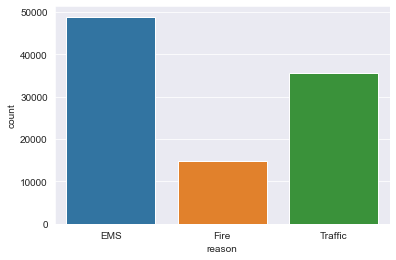

In [262]:
sns.countplot(x='reason', data=df)

### Timestamp converting
**Jetzt werden wir uns mehr auf die Zeitinformationen konzentrieren. Welchen Datentyp haben die Objekte in der *timestamp* Spalte?**

In [263]:
type(df['timeStamp'][0])

df.dtypes
df['timeStamp'][0]
df['timeStamp'].iloc[0]

pandas._libs.tslibs.timestamps.Timestamp

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
hour                  int64
month                 int64
day                  object
date                 object
dtype: object

Timestamp('2015-12-10 17:40:00')

Timestamp('2015-12-10 17:40:00')

**Das Ergebnis der vorherigen Aufgabe sollte zeigen, dass diese Zeitinformation noch als String vorliegt. Nutze `pd.to_datetime`([Dokumentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)), um diese Spalte vom String zum DateTime Datentyp zu ändern.**

In [264]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])
df.dtypes

pandas._libs.tslibs.timestamps.Timestamp

lat                 float64
lng                 float64
desc                 object
zip                 float64
title                object
timeStamp    datetime64[ns]
twp                  object
addr                 object
e                     int64
reason               object
hour                  int64
month                 int64
day                  object
date                 object
dtype: object

**Jetzt können wir spezifische Attribute des DateTime-Objekts abrufen, indem wir sie aufrufen. Zum Beispiel:**

    time = df['timeStamp'].iloc[0]
    time.hour
    
Durch Jupyters *Tab-Funktion* lassen sich alle Attribute erkunden, die wir auf "time" anwenden könnten.

**Unsere Zeitinformationen liegen jetzt als DateTime Objekt vor. Nutze .apply() um 3 neue Spalten mit Namen "Hour" (dt. Stunde), "Month" (dt. Monat) und "Day of Week" (dt. Wochentag). Dazu bietet sich am besten die "timeStamp" Spalte an. Falls Schwierigkeiten beim Coden auftreten kannst du auf die Lösung zurückgreifen.**

In [265]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day'] = df['timeStamp'].apply(lambda x: x.dayofweek)

df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2,2016-08-24


**Achte darauf, dass der "Day of Week" eine Zahl von 0 bis 6 ist. Nutze die `.map()` Methode mit folgendem Dictionary, um daraus Strings zu machen:**

In [266]:
day_key = list(range(7))
day_values = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
day_dict = dict(zip(day_key, day_values))

df['day'] = df['day'].map(lambda x: day_dict[x])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,thu,2015-12-10


### Timestamp grouping and analysis
**Jetzt nutze Searborn, um ein `countplot` zu erstellen. Es soll für jeden Wochentag farblich unterscheiden, was der Grund für den Notruf war.**

<AxesSubplot:xlabel='day', ylabel='count'>

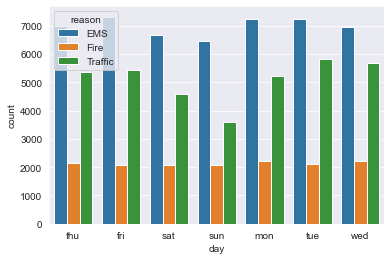

In [267]:
sns.countplot(x='day', hue='reason', data=df)

**Tue jetzt das gleiche für jeden Monat.**

<AxesSubplot:xlabel='month', ylabel='count'>

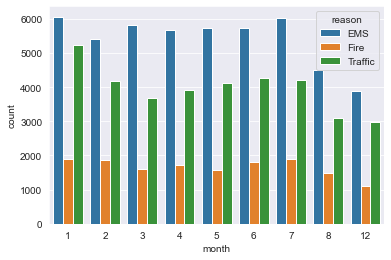

In [268]:
sns.countplot(x='month', hue='reason', data=df)

**Fällt dir etawas an diesem Diagramm auf?**

Dir sollte auffallen, dass einige Monate fehlen. Lass uns versuchen die fehlende Information zurückzuholen indem wir sie anders darstellen. Evtl. ein einfaches Liniendiagramm. Um das zu erreichen verwenden wir Pandas...

**Erstelle jetzt ein groupby-Objekt namens "byMonth", indem du den DataFrame nach der Monatsspalte und nutze die `count()` Methode zur Aggregation. Anschließend nutze die `head()` Methode auf den zurückgegebenen DataFrame.**

In [269]:
byMonth = df.groupby('month').count()
byMonth
byMonth.reset_index()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,date
month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


,month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,day,date
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969,7969


**Erstelle eine einfaches Diagramm des DataFrames der den Anzahl (en. count) von Anrufen pro Monat zeigt.**

<AxesSubplot:xlabel='month'>

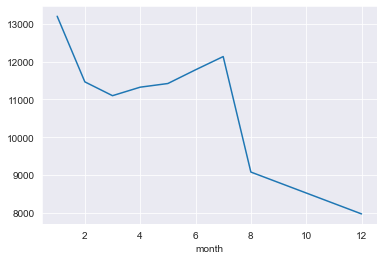

In [270]:
byMonth['title'].plot()

**Jetzt versuche Seaborn's `lmplot()`, um eine lineare Annäherung auf die Anrufe pro Monat zu legen.**

*Hinweis: Denke daran, dass der Index möglicherweise zu einer Spalte gesetzt werden muss.*

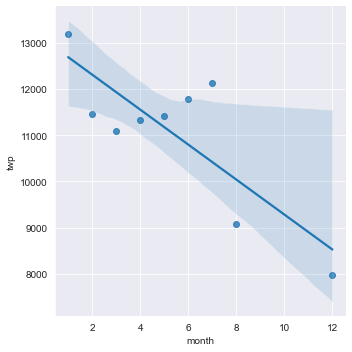

In [271]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

**Erstelle eine neue Spalte namens "Date" (dt. Datum), die das Datum aus der timeStamp Spalte beinhaltet. Dazu wirst du die `.date()` Methode nutzen müssen.**

In [272]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,thu,2015-12-10


**Gruppiere jetzt über diese Date Spalte und aggregiere mit `count()`. Erstelle dann ein Diagramm der Anzahl an Notrufen.**

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,day
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


<AxesSubplot:xlabel='date'>

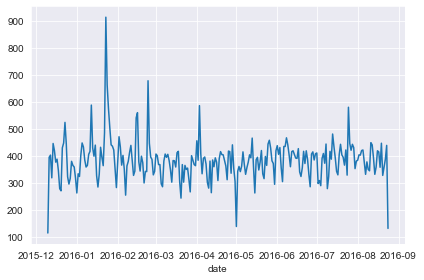

In [273]:
byDate = df.groupby('date').count()
byDate.head()
byDate['twp'].plot()
plt.tight_layout()

**Erstelle dieses Diagramm nun erneut, aber trenne insgesamt drei Diagramme für jeden Grund von Notruf.**

In [274]:
# df[df['reason'] == 'EMS']
# df[df['reason'] == 'EMS'].groupby('date')
# df[df['reason'] == 'EMS'].groupby('date').count()
# df[df['reason'] == 'EMS'].groupby('date').count()['twp']

<AxesSubplot:xlabel='date'>

Text(0.5, 1.0, 'EMS')

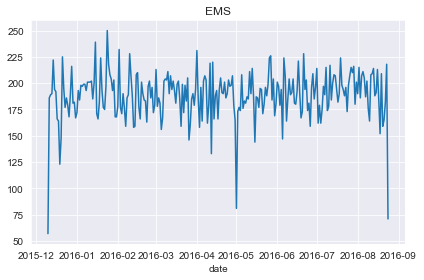

In [275]:
df[df['reason'] == 'EMS'].groupby('date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

<AxesSubplot:xlabel='date'>

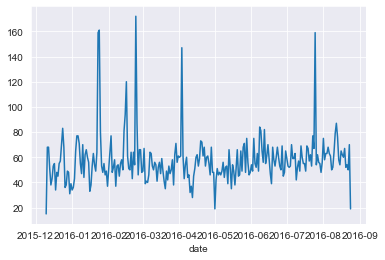

In [276]:
df[df['reason'] == 'Fire'].groupby('date').count()['twp'].plot()

<AxesSubplot:xlabel='date'>

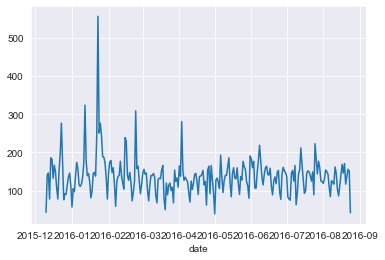

In [277]:
df[df['reason'] == 'Traffic'].groupby('date').count()['twp'].plot()

### Re-Arrange for Heatmap

**Jetzt können wir mit Heatmaps und Seaborn weitermachen. Dazu müssen wir unseren DataFrame etwas restrukturieren, sodass die Stunden zu den Spalten werden und der "Day of Week" der Index. Es gibt dazu viele Möglichkeiten. Ich empfehle eine Kombination aus `groupby` und der `unstack` ([zur Dokumentation](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)) Methode.**

Falls du hier nicht weiter kommst schaue in die Lösung.

In [292]:
dayHour = df.groupby(by=['day', 'hour']).count()['reason'].unstack()
dayHour.columns
dayHour.index
dayHour
# dayHour = df.groupby(by=['hour', 'day']).count()
# dayHour.loc[0]['lat']
# dayHour.loc[0]['lat'].loc[['fri','sat']]


Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64', name='hour')

Index(['fri', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed'], dtype='object', name='day')

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


**Erstelle jetzt eine HeatMap unter Verwendung des neuen DataFrames.**

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='hour', ylabel='day'>

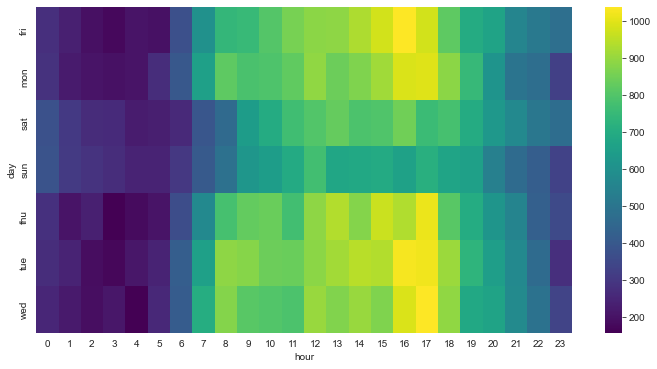

In [300]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

**Erstelle jetzt eine Clustermap unter Verwendung des neuen DataFrames.**

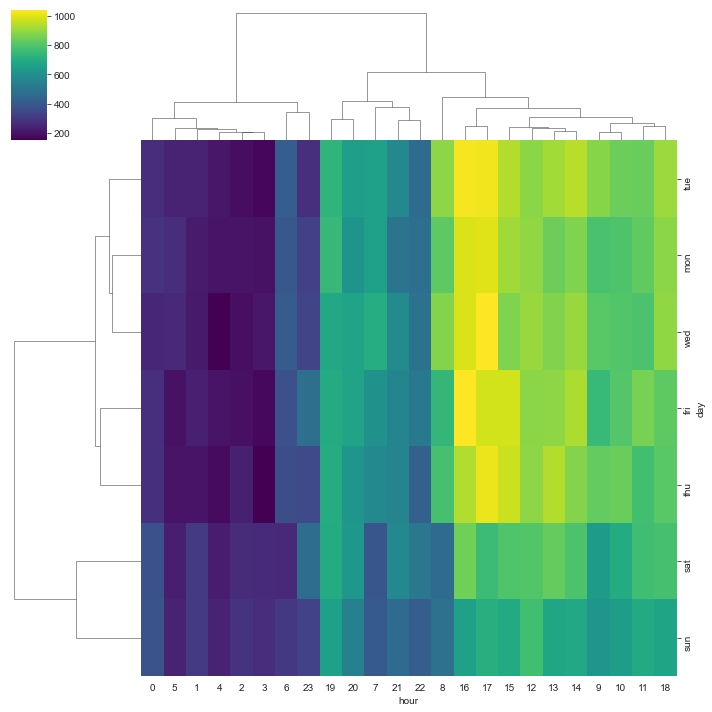

In [302]:
sns.clustermap(dayHour, cmap='viridis')

**Wiederhole diesen Vorgang nun unter Verwendung des Monats als Spaltenunterteilung.**

In [304]:
monthHour = df.groupby(by=['day', 'month']).count()['reason'].unstack()
monthHour

month,1,2,3,4,5,6,7,8,12
day,,,,,,,,,
fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
sat,2291,1441,1266,1734,1444,1388,1695,1099,978
sun,1960,1229,1102,1488,1424,1333,1672,1021,907
thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='month', ylabel='day'>

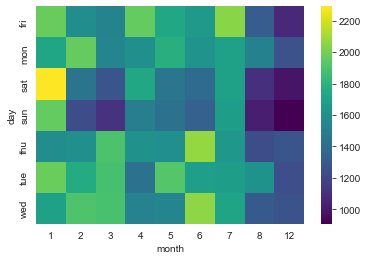

In [306]:
sns.heatmap(monthHour, cmap='viridis')

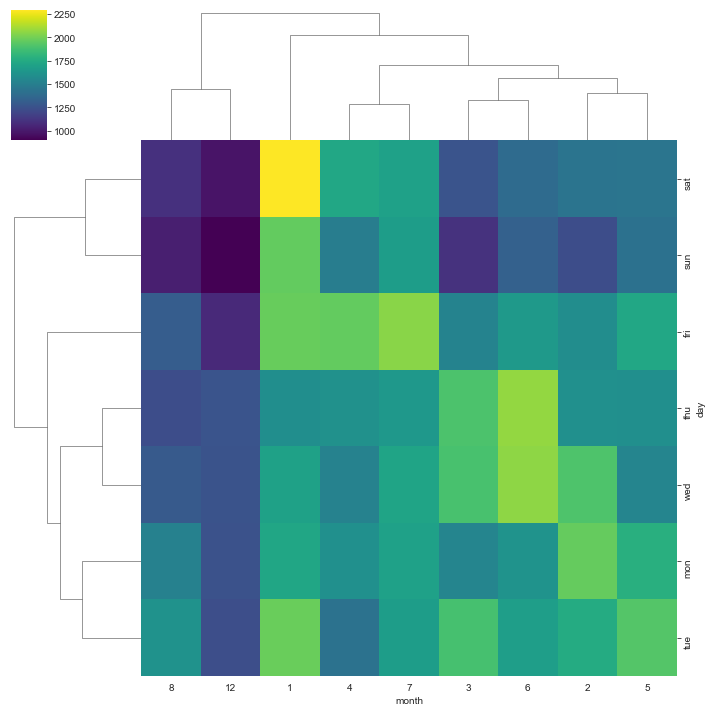

In [307]:
sns.clustermap(monthHour, cmap='viridis')

**Super! Jetzt kannst du die Daten gerne noch weiter auf eigene Faust erkunden.**

# Gut gemacht!


In [279]:
df3 = pd.DataFrame(np.arange(9).reshape(3, 3), index='A B C'.split(), columns='1 2 3'.split())
df3

,1,2,3
A,0,1,2
B,3,4,5
C,6,7,8


In [280]:
df3['2'].replace(4, 'X', inplace=True)

In [281]:
df3['3'][df3.index == 'B'] = 42
df3

C:\Users\das_m\AppData\Local\Temp\ipykernel_7332\2576867586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['3'][df3.index == 'B'] = 42


,1,2,3
A,0,1,2
B,3,X,42
C,6,7,8


In [282]:
df3.loc["C", "2"]
df3.loc["C"]

7

1    6
2    7
3    8
Name: C, dtype: object

In [283]:
df3.iloc[-1, 1:3]

2    7
3    8
Name: C, dtype: object